<img src = "images\What-does-a-film-studio-do.jpg">

# Assessing the Commercial viability of a new movie studio for original content creation.

***

## Overview

The project has been undertaken to assess the commercial viablity of setting up a movie studio for original content creation and to determine the most profitable and promising film genre that the studio can create to achieve the objectives of profit maximization,business reputation growth and wealth creation for its shareholders.
***

### Business Problem

<img src = "images\moringa_clips.jpeg" width="300">

Moringa Clips is a web video service company that wants to join the original content creation space and have decided to set up their own movie studio to achieve this.They have no experience in film production.In order to determine what type of films the studio should create, we have to conduct an exploratory data analysis on data collected from various review websites to generate insights that will guide the film production team on the way to go about the new project. 

The target audience of this project is as follows:
* The creative director of the film studio.
* Company shareholders.
* Financial insitutions providing Credit facilities to production companies.
* The finance department of the company.

The key objective questions are as follows:
1. What movie genre generates the highest ratings in box-offices?

2. What is the most profitable genre of films when we compare movie budget to gross income at box office?

3. Does a higher movie budget guarantee a higher profit margin on the movie?

4. Which existing top 5 movie studios generate the highest box office gross (total_gross)?


5. Are higher movie ratings a result of a higher movie budget or higher worldwide gross box office revenue?   
***

## Data Understanding

### The Data

In the folder `data` are movie datasets from:

* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

Because it was collected from various locations, the different files have different formats. Some are compressed CSV (comma-separated values) or TSV (tab-separated values) and then there is a IMDB database.

The IMDB database Entity Relationship Diagram is as follows:

![movie data erd](https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-2-project-v3/main/movie_data_erd.jpeg)

### Loading the relevant packages

In [45]:
# Importing the nessesary libraries
from math import * #Makes basic math operations easier
from itertools import * # Makes grouping within a noebook easier.
from collections import * #To make count operations easier
import sqlite3 # To read into the database
import pandas as pd
import scipy.stats as stats #For statistical operations(Hypothesis testing)
import matplotlib.pyplot as plt# Plotting data
import seaborn as sns
import numpy as np # For numerical operations
import statsmodels.api as sm # For regression equations
plt.style.use('seaborn-v0_8-whitegrid') #Setting the style for the regression plots

%matplotlib inline

### Connecting and reading through `im.db` database.
* For the project we are mostly concerned with the `movie_basics` and `movie_ratings` tables however,as we are working through the analysis we may read through other tables.

In [46]:
#Connecting into the database using SQL Lite
conn = sqlite3.connect("data/im.db")
cursor = conn.cursor()

#Converting the relevant tables into Dataframes
movie_basics = '''SELECT *
                    FROM movie_basics;
                    '''
movie_ratings = '''SELECT *
                    FROM movie_ratings;'''

movie_basics_df = pd.read_sql(movie_basics, conn)
movie_ratings_df = pd.read_sql(movie_ratings, conn)

In [47]:
#Displaying the first 5 rows and the information for movie_basics
print(movie_basics_df.head())


    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


In [48]:
print(movie_basics_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


In [49]:
# Displaying the first 5 rows of movie_ratings and the info for movie_ratings.

print(movie_ratings_df.head())



     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21


In [50]:
print(movie_ratings_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


### Loading and reading through the movie budget and gross box office movie CSV files.
* This is a nessesary dataset since we are concerned with the commercial viability of building a new studio.

#### The gross box office movie dataframe

In [51]:
# Gross Box Office Revenue
# Loading and reading through the Gross box office movie dataset.

gross_bom = pd.read_csv("data/Bom.movie_gross.csv")

#Displaying the first 5 rows
print(gross_bom.head())


                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


In [52]:
#Displaying the information about the Box Office Gross Revenue
print(gross_bom.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


#### The movie budget dataframe

In [53]:
#Loading Dataframe and Displaying first 5 rows
movie_budget = pd.read_csv("data/tn.movie_budgets.csv", index_col="id")

print(movie_budget.head())

    release_date                                        movie  \
id                                                              
1   Dec 18, 2009                                       Avatar   
2   May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
3    Jun 7, 2019                                 Dark Phoenix   
4    May 1, 2015                      Avengers: Age of Ultron   
5   Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget domestic_gross worldwide_gross  
id                                                   
1       $425,000,000   $760,507,625  $2,776,345,279  
2       $410,600,000   $241,063,875  $1,045,663,875  
3       $350,000,000    $42,762,350    $149,762,350  
4       $330,600,000   $459,005,868  $1,403,013,963  
5       $317,000,000   $620,181,382  $1,316,721,747  


In [54]:
# Displaying information on the dataframe.

print(movie_budget.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB
None


***
### Understanding and describing the data

After previewing the data we can say that:
1. Within the im.db database
    * The primary key for both the `movie_basics` and `movie_ratings` is the `movie_id`
    * The two tables both contain columns with strings,integers and floats
    * Within the `movie_basics` table,there are some missing values in the `original_title`, `runtime_minutes` and `genres` columns.
    * The `movie_ratings` table has no missing values but it has has about a half as many entries as `movie_basics`

2. Within the `gross_bom` and `movie_budget` tables:
    * The some of the columns in the `gross_bom` contain missing values and the `foreign_gross` is set to the wrong datatype
    * The data in the `gross_bom` is only limited from 2010 to 2018
    * The `movie_budget` table contains no missing values however the `production_budget`, `domestic_gross` and `worlwide_gross` columns are of the wrong data type.
***

***
## Data Preparation

As described above there are various things that are required to prepare the data for analysis:
1. Join the `movie_basics` to the `movie_ratings` column using the `INNER JOIN` method
2. Drop the rows with no runtime.
3. Drop the rows containing missing values in `genres`
4. For the purpose of data modelling we need to drop rows with less than 1000 reviews to avoid skewed data and outliers.This can be done when we combine the `movie_basics` and `movie_ratings` tables
5. Set the correct data types in the `gross_bom` and `movie_budget` columns.
6. Create a column in the `gross_bom` that sums both the domestic and foreign gross columns.
7. Group data after joining the relevant `movie_basics` and `movie_ratings` columns by genre.
***

### 1. Data Cleaning.

#### For the `im.db` database.

* First step is to join the tables in the `im.db` database into a singular dataframe then order by ratings and then number of votes.

In [55]:
# Using SQL syntax to join tables.

names_and_ratings = '''SELECT movie_id, averagerating, numvotes, primary_title, runtime_minutes, genres
                        FROM movie_ratings
                        JOIN movie_basics
                        USING (movie_id)
                        WHERE numvotes >= 1000
                        ORDER BY averagerating DESC, numvotes;'''

# Converting into a dataframe and reading the first 5 rows

names_and_ratings_df = pd.read_sql(names_and_ratings, conn)
names_and_ratings_df.head()


,movie_id,averagerating,numvotes,primary_title,runtime_minutes,genres
0,tt7131622,9.7,5600,Once Upon a Time ... in Hollywood,159.0,"Comedy,Drama"
1,tt4131686,9.6,1339,I Want to Live,106.0,"Adventure,Biography,Documentary"
2,tt6058226,9.6,2604,Ekvtime: Man of God,132.0,"Biography,Drama,History"
3,tt5963218,9.5,6509,Aloko Udapadi,113.0,"Drama,History"
4,tt7738784,9.4,9629,Peranbu,147.0,Drama


* Then we look into the information of the dataframe to confirm the join was successful.

In [56]:
# Using pandas to read into the information
names_and_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9617 entries, 0 to 9616
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         9617 non-null   object 
 1   averagerating    9617 non-null   float64
 2   numvotes         9617 non-null   int64  
 3   primary_title    9617 non-null   object 
 4   runtime_minutes  9609 non-null   float64
 5   genres           9615 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 450.9+ KB


* Now we can drop rows that contain missing values in the runtime and genres columns.For this, in the interest of saving time, we can create a function thet can solve for both.

In [57]:
# Creating a function to drop missing values in a column.

def drop_rows_with_missing_values(df, column_name):
    '''Removes rows from a pandas DataFrame where a specified column has empty or missing values.

    Args:
        df: The pandas DataFrame to process.
        column_name: The name of the column to check for empty values.

    Returns:
        A DataFrame with rows removed.'''
    return df.dropna(subset=column_name)

In [58]:
# Applying the function to drop the missing runtime values.

names_and_ratings_df = drop_rows_with_missing_values(names_and_ratings_df, 'runtime_minutes')

In [59]:
# Reapeating the process for genres

names_and_ratings_df = drop_rows_with_missing_values(names_and_ratings_df, 'genres')

* Now when we use the `.info()` method to check for missing values.The number of entries across the columns should be the same.

In [60]:
names_and_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9607 entries, 0 to 9616
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         9607 non-null   object 
 1   averagerating    9607 non-null   float64
 2   numvotes         9607 non-null   int64  
 3   primary_title    9607 non-null   object 
 4   runtime_minutes  9607 non-null   float64
 5   genres           9607 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 525.4+ KB


* Now we have to group the data based on genre. The column shows for some entries, more than one genre is indicated thus we have to create separate the genre entries into separate columns in each row.This will allow is to model the data later in the analysis.

In [61]:
# Striping the strings in genres and assigning it to different columns.

# Strip whitespace and split the 'genres' column into a list of genres
names_and_ratings_df['genres'] = names_and_ratings_df['genres'].str.strip()  # Remove leading and trailing whitespace
names_and_ratings_df['genres_list'] = names_and_ratings_df['genres'].str.split(',')  # Split the genres into a list using ',' as the delimiter

# Assign split genres to new columns
# Determine the maximum number of genres in any row
max_genres = names_and_ratings_df['genres_list'].apply(len).max()

# Create new columns for each genre
for i in range(max_genres):
    names_and_ratings_df[f'genre_{i+1}'] = names_and_ratings_df['genres_list'].apply(lambda x: x[i] if i < len(x) else None)

# Display the updated DataFrame to verify the new columns
names_and_ratings_df.head()


,movie_id,averagerating,numvotes,primary_title,runtime_minutes,genres,genres_list,genre_1,genre_2,genre_3
0,tt7131622,9.7,5600,Once Upon a Time ... in Hollywood,159.0,"Comedy,Drama","[Comedy, Drama]",Comedy,Drama,None
1,tt4131686,9.6,1339,I Want to Live,106.0,"Adventure,Biography,Documentary","[Adventure, Biography, Documentary]",Adventure,Biography,Documentary
2,tt6058226,9.6,2604,Ekvtime: Man of God,132.0,"Biography,Drama,History","[Biography, Drama, History]",Biography,Drama,History
3,tt5963218,9.5,6509,Aloko Udapadi,113.0,"Drama,History","[Drama, History]",Drama,History,None
4,tt7738784,9.4,9629,Peranbu,147.0,Drama,[Drama],Drama,None,None


* We can now drop the `genres` and `genres_list` columns as they are redundant.

In [62]:
names_and_ratings_df.drop(columns=['genres','genres_list'], inplace=True)
names_and_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9607 entries, 0 to 9616
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         9607 non-null   object 
 1   averagerating    9607 non-null   float64
 2   numvotes         9607 non-null   int64  
 3   primary_title    9607 non-null   object 
 4   runtime_minutes  9607 non-null   float64
 5   genre_1          9607 non-null   object 
 6   genre_2          7584 non-null   object 
 7   genre_3          4602 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 675.5+ KB


#### For the `gross_bom` table:

* We need to convert the `foreign_gross` from an object to a float to perform numerical operations and for feature engineering.

In [63]:
# To change all values in the column from a string to a number and replaces null values with 0
gross_bom['foreign_gross'] = pd.to_numeric(gross_bom['foreign_gross'], errors='coerce').fillna(0)
gross_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


* We then need to relace the null values in `domestic_gross` with 0

In [64]:
gross_bom['domestic_gross'] = gross_bom['domestic_gross'].fillna(0)
gross_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


* Create a column that calculates `total_pay` which is a sum of `domestic_gross` and `foreign_gross`

In [65]:
gross_bom['total_pay'] = gross_bom['domestic_gross'] + gross_bom['foreign_gross']
gross_bom.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
 5   total_pay       3387 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 158.9+ KB


* Finally we can drop rows with no studio entry.

In [66]:
# Drop rows of movies not produced by a studio.
gross_bom = gross_bom.dropna(subset= 'studio')
gross_bom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
 5   total_pay       3382 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 185.0+ KB


#### For the `movie_budget` table:
* We need to change the `production_budget` , `domestic_gross` and `worldwide_gross` columns to a numeric type then add a column that calculates the `profit` which is the differnce between `worldwide_gross` and `production_budget`.
* We will then sort it into decending order of `worldwide_gross`

In [67]:
# Converting the columns to numeric datatype

movie_budget['domestic_gross'] = pd.to_numeric(movie_budget['domestic_gross'].replace('[\$,]', '', regex=True), errors='coerce')
movie_budget['production_budget'] = pd.to_numeric(movie_budget['production_budget'].replace('[\$,]', '', regex=True), errors='coerce')
movie_budget['worldwide_gross'] = pd.to_numeric(movie_budget['worldwide_gross'].replace('[\$,]', '', regex=True), errors='coerce')

# Create a column that calculates profit

movie_budget['profit'] = movie_budget['worldwide_gross'] - movie_budget['production_budget']

# Sort table in decending order of woldwide_gross 

movie_budget.sort_values(by ='worldwide_gross', ascending =False, inplace=True)

# Display the first 5 rows
movie_budget.head()

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\eugene.maina\AppData\Local\Temp\ipykernel_14180\3742640961.py:3: SyntaxWarning: invalid escape sequence '\$'
  movie_budget['domestic_gross'] = pd.to_numeric(movie_budget['domestic_gross'].replace('[\$,]', '', regex=True), errors='coerce')
C:\Users\eugene.maina\AppData\Local\Temp\ipykernel_14180\3742640961.py:4: SyntaxWarning: invalid escape sequence '\$'
  movie_budget['production_budget'] = pd.to_numeric(movie_budget['production_budget'].replace('[\$,]', '', regex=True), errors='coerce')
C:\Users\eugene.maina\AppData\Local\Temp\ipykernel_14180\3742640961.py:5: SyntaxWarning: invalid escape sequence '\$'
  movie_budget['worldwide_gross'] = pd.to_numeric(movie_budget['worldwide_gros

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864


### 2.Feature engineering
* First thing is to group the `gross_bom` table by studio then sort them from highest to lowest `total_gross`


In [68]:
# Creating a dataframe that groups movies based on studio.
studio = gross_bom.groupby('studio').agg({
									'domestic_gross': 'sum',
									'foreign_gross': 'sum',
									'total_pay': 'sum'
								}).reset_index()

# Sorting the grouped dataframe by total_pay in descending order
studio.sort_values(by='total_pay', ascending=False, inplace=True)

# Displaying the grouped dataframe
studio.head()

,studio,domestic_gross,foreign_gross,total_pay
36,BV,1.841903e+10,2.579385e+10,4.421288e+10
93,Fox,1.094950e+10,2.005587e+10,3.100537e+10
246,WB,1.216805e+10,1.866790e+10,3.083595e+10
238,Uni.,1.290239e+10,1.685477e+10,2.975716e+10
215,Sony,8.459683e+09,1.394535e+10,2.240504e+10


* Then we can create a table that compares both worldwide box-office movie numbers and production budget using movie name columns in both.This will allow us to compare the relationship between the variables.

In [69]:
# Clean and and format the cells containing movie name in both datasets
names_and_ratings_df['primary_title'] = names_and_ratings_df['primary_title'].str.strip().str.lower()
movie_budget['movie'] = movie_budget['movie'].str.strip().str.lower()

# Merge the datasets on the appropriate column
budget_and_ratings_df = pd.merge(names_and_ratings_df, movie_budget, left_on='primary_title', right_on='movie', how='inner')

# Inspect the merged dataset

print(budget_and_ratings_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1834 non-null   object 
 1   averagerating      1834 non-null   float64
 2   numvotes           1834 non-null   int64  
 3   primary_title      1834 non-null   object 
 4   runtime_minutes    1834 non-null   float64
 5   genre_1            1834 non-null   object 
 6   genre_2            1674 non-null   object 
 7   genre_3            1231 non-null   object 
 8   release_date       1834 non-null   object 
 9   movie              1834 non-null   object 
 10  production_budget  1834 non-null   int64  
 11  domestic_gross     1834 non-null   int64  
 12  worldwide_gross    1834 non-null   int64  
 13  profit             1834 non-null   int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 200.7+ KB
None


***
## Data Modelling

Using the data we prepared above we can now answer the the objective questions.

### 1. What genre generates the highest movie ratings?

<Figure size 640x480 with 0 Axes>

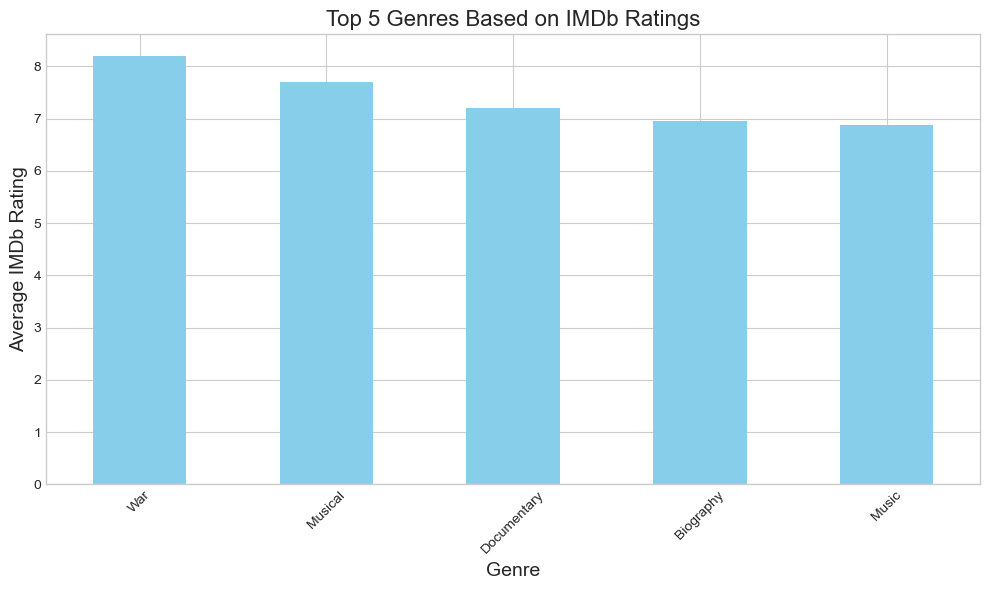

Note: Assuming the first stated genre in column [genre_1] is the primary genre


In [70]:
# Group the data by genre and calculate the average IMDb rating
genre_ratings = names_and_ratings_df.groupby('genre_1')['averagerating'].mean().sort_values(ascending=False)

# Select the top 5 genres
top_5_genres = genre_ratings.head(5)

# Plot the bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_5_genres.plot(kind='bar', color='skyblue')

# Add chart title and labels
plt.title('Top 5 Genres Based on IMDb Ratings', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average IMDb Rating', fontsize=14)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('images/best_genres.jpg')

print("Note: Assuming the first stated genre in column [genre_1] is the primary genre")

### 2. What is the most profitable genre to produce movies [`average worldwide gross box office` - `average production budget`] ?

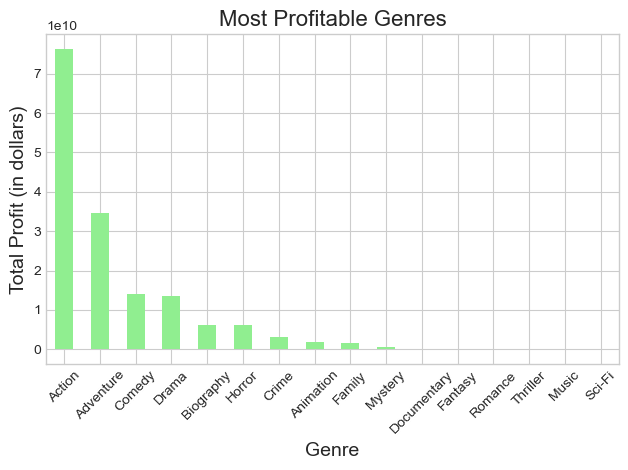

In [71]:
# Plot a graph that illustrates the most profitable genre.

# Group by genre and calculate the total profit for each genre
genre_profit = budget_and_ratings_df.groupby('genre_1')['profit'].sum().sort_values(ascending=False)

# Plot the most profitable genres
genre_profit.plot(kind='bar', color='lightgreen')

# Add chart title and labels
plt.title('Most Profitable Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total Profit (in dollars)', fontsize=14)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('images/Profitable_genres.jpg')

 ### 3. Does a higher movie budget guarantee a higher profit margin when creating a movie?

* We need to test our hypothesis using a predictive equation then read through the results using `sm.OLS(y , sm.add_constant(x)).summary()`

With these results we then:
* Test the null hypothesis and the alternatative hypothesis.
* Create a regression equation to predict results.
* Evaluate the equation using MSE and RMSE.
* Plot the regression plot and the residual plot.

No. 1 and 2:

*Null* = A higher production budget equals a higher profit margin.

*Alternative* = A higher production budget does not equal a higher profit margin.

        

In [72]:
# Plotting (movie budget vs profit) and its residuals.
# import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score

# determine independent and dependent variables

X = movie_budget['production_budget']
y = movie_budget['profit']

# Creating a predictive model.Split the data set in a 80/20 split.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modelling the algorithim

profit_equation = sm.OLS(y_train, sm.add_constant(x_train)).fit()

profit_equation.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     2599.
Date:                Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:08:32   Log-Likelihood:                -92463.
No. Observations:                4625   AIC:                         1.849e+05
Df Residuals:                    4623   BIC:                         1.849e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7.814e+06   2.15e+06     -3.639      0.000    -1.2e+07    -3.6e+06
production_budget     2.1119      0.041     50.984      0.000       2.031       2.193
==============================================================================
Omnibus:                     3541.892   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           170399.290
Skew:                           3.206   Prob(JB):                         0.00
Kurtosis:                      32.037   Cond. No.                     6.50e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***
* From the data it shows that **36%** of the variance in profit can be determined by the model.

* the p value of the equation is well below the standard accepted alpha of statistics (5%).This means we must reject the null hypothesis.

* There is a high multicollinearity figure,this means the the independent variable is strongly correlated with other variables thus any small change within the other variables can affect the results of the plot.

* The equation can be defined as **`y = 2.112(X) - 7.814 to the power of 6`**
***

3. Then we can calculate MSE(Means squared error), RMSE(Rooot Means Squared error) and then visualise the regression plot and plot the residuals plot to test the accuracy of the model.

In [73]:
## Actual data from y_test
# y=mx+c
#  y = 2.112(X) - 7.814 to the power of 6  
#making predictions
y_predictions = profit_equation.predict(sm.add_constant(x_test))


#Evaluating performance(MSE,RMSE)

reg_mse = mean_squared_error(y_test,y_predictions)

reg_rmse = root_mean_squared_error(y_test,y_predictions)

print(f'The Means squared Error is:{reg_mse}')
print(f'The Root Means squared Error is:{reg_rmse}')

The Means squared Error is:1.2907370659042968e+16
The Root Means squared Error is:113610609.79962641


***
**The model after carrying out the RMSE and MSE shows that the model would be weak in terms of predicting profit in terms of production budget committed to the movie**
***

4. Finally we plot the regression plot to find the line of best fit and the residuals plot.

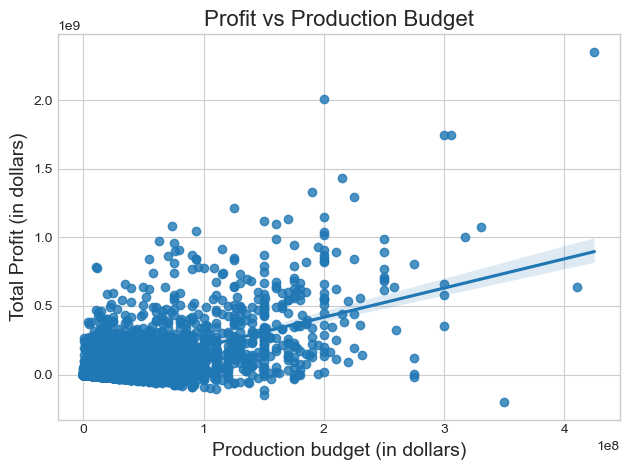

In [74]:
# The rergression plot.

sns.regplot(x=X, y=y, data=movie_budget)

# Add chart title and labels
plt.title('Profit vs Production Budget', fontsize=16)
plt.xlabel('Production budget (in dollars)', fontsize=14)
plt.ylabel('Total Profit (in dollars)', fontsize=14)

plt.tight_layout()
plt.show()
plt.savefig('images/profit_vs_production_budget.jpg')


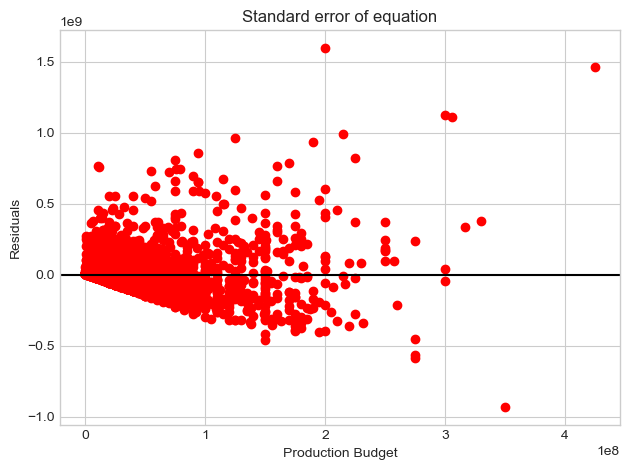

In [75]:
# The residual plot

# Calculate residuals using the training data
residuals = y_train - profit_equation.predict(sm.add_constant(x_train))

plt.scatter(x_train, residuals, color='red')
plt.title("Standard error of equation")
plt.axhline(y=0, color="black")
plt.xlabel("Production Budget")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()
plt.savefig('images/standard_error_of_profit_equation.jpg')

### 4. What are the top 5 movie studios thet generate the highest total gross box office revenue?

C:\Users\eugene.maina\AppData\Local\Temp\ipykernel_14180\1113801619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_studios, x='studio', y='total_pay', palette='viridis')


<Figure size 640x480 with 0 Axes>

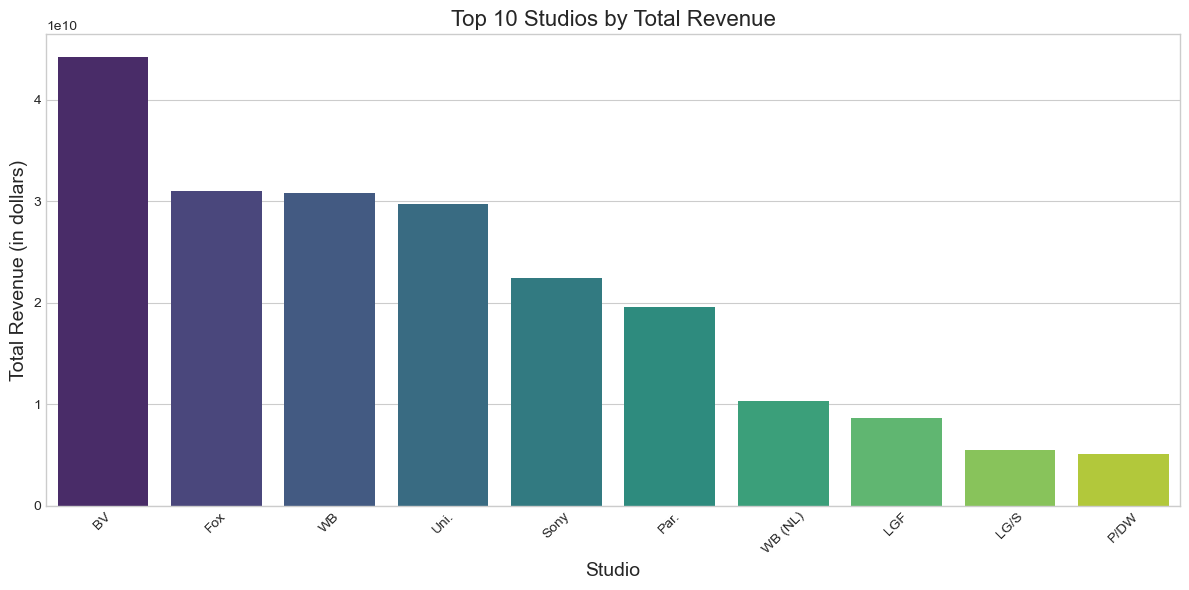

In [76]:
# Plotting a bar graph to show studio revenue.

# picking top 10 studios by total revenue
top_10_studios = studio.nlargest(10, 'total_pay')

# Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_studios, x='studio', y='total_pay', palette='viridis')

# Add chart title and labels
plt.title('Top 10 Studios by Total Revenue', fontsize=16)
plt.xlabel('Studio', fontsize=14)
plt.ylabel('Total Revenue (in dollars)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
plt.savefig('images/top_10_movie_studios.jpg')



### 5. Is a higher movie rating a result of a higher total box office gross or a higher production budget.

* This question determines whether if it is the quantity of money spent on a movie or the quality of actors, props, scenes, directors and writers aquired for the movie that results in a higher rating. 

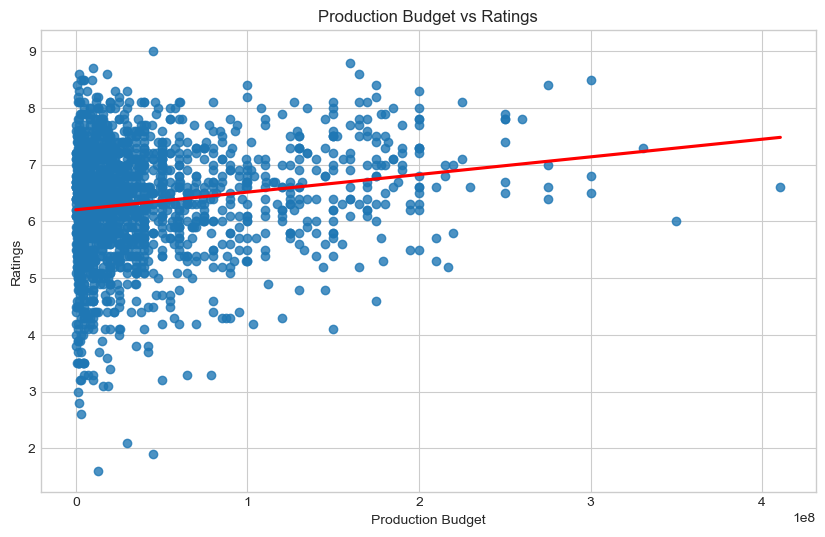

In [82]:
# using statsmodels to detemine the two regression equations and seaborn to plot line of best fit.

# Define independent and dependent variables for production_budget vs ratings
X_budget = budget_and_ratings_df['production_budget']
y_ratings = budget_and_ratings_df['averagerating']

# Add a constant to the independent variable for statsmodels
X_budget_plus_c = sm.add_constant(X_budget)

# Fit the regression model for production_budget vs ratings
model_budget = sm.OLS(y_ratings, X_budget_plus_c).fit()


# Plot the line of best fit for production_budget vs ratings
plt.figure(figsize=(10, 6))
sns.regplot(x=X_budget, y=y_ratings, line_kws={"color": "red"}, ci=None)
plt.title("Production Budget vs Ratings")
plt.xlabel("Production Budget")
plt.ylabel("Ratings")
plt.show()
plt.savefig('images/production_budget_vs_ratings.jpg')




<Figure size 640x480 with 0 Axes>

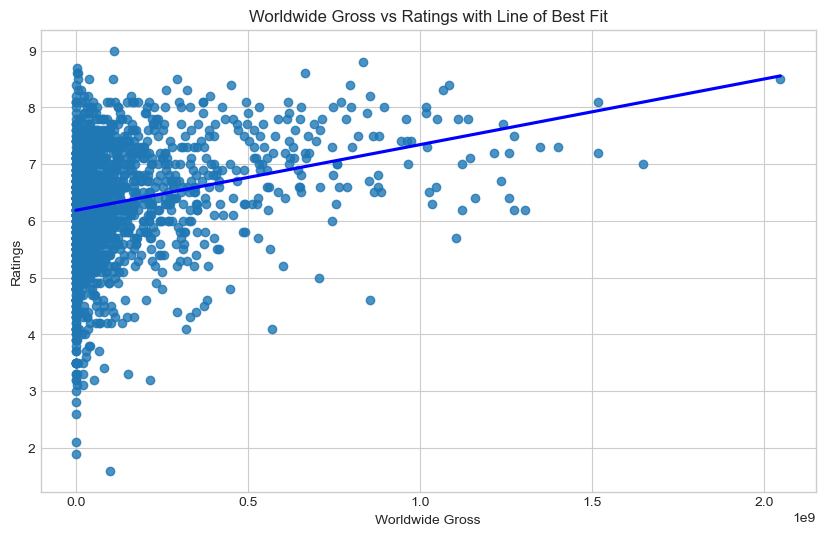

In [83]:
# Define independent and dependent variables for worldwide_gross vs ratings
X_gross = budget_and_ratings_df['worldwide_gross']
X_gross_plus_c = sm.add_constant(X_gross)

# Fit the regression model for worldwide_gross vs ratings
model_gross = sm.OLS(y_ratings, X_gross_plus_c).fit()

# Plot the line of best fit for worldwide_gross vs ratings
plt.figure(figsize=(10, 6))
sns.regplot(x=X_gross, y=y_ratings, line_kws={"color": "blue"}, ci=None)
plt.title("Worldwide Gross vs Ratings with Line of Best Fit")
plt.xlabel("Worldwide Gross")
plt.ylabel("Ratings")
plt.show()
plt.savefig('images/world_wide_gross_vs_ratings.jpg')

## Evaluation

## Conclusions